TODO: Write down the purpose of this markdown file and what it does


In [1]:
#Import Necessary libraries
library('tidyverse')
library('dplyr')
library('forcats')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
#Read Data
trainVehicles = read.csv('03a-vehicles-sample.csv')
holdoutVehicles = read.csv('03b-vehicles-holdout.csv')

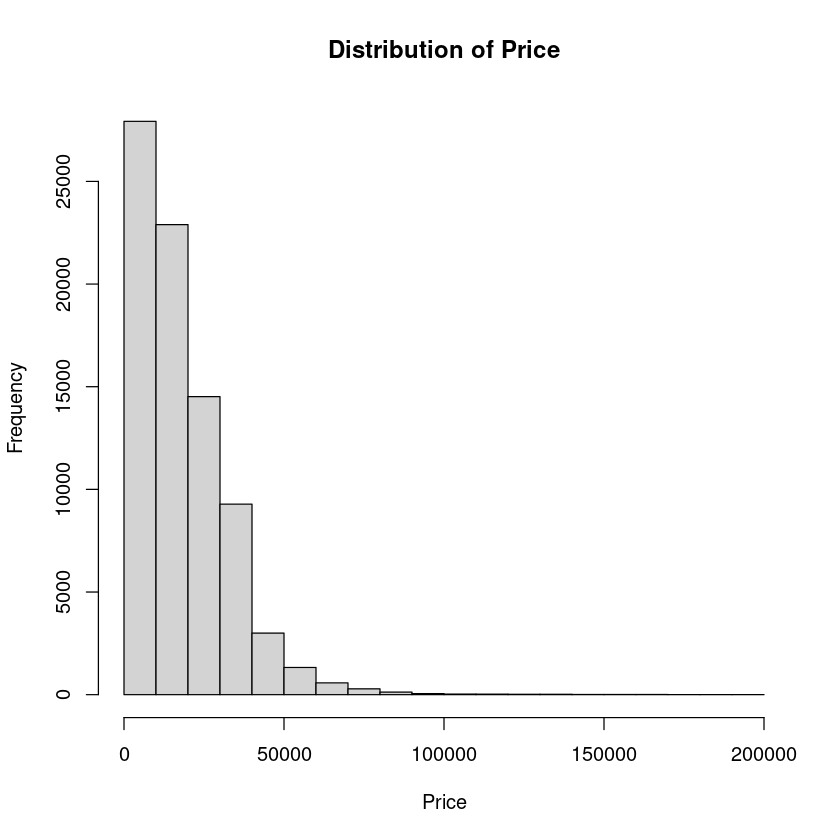

[1] -0.671225

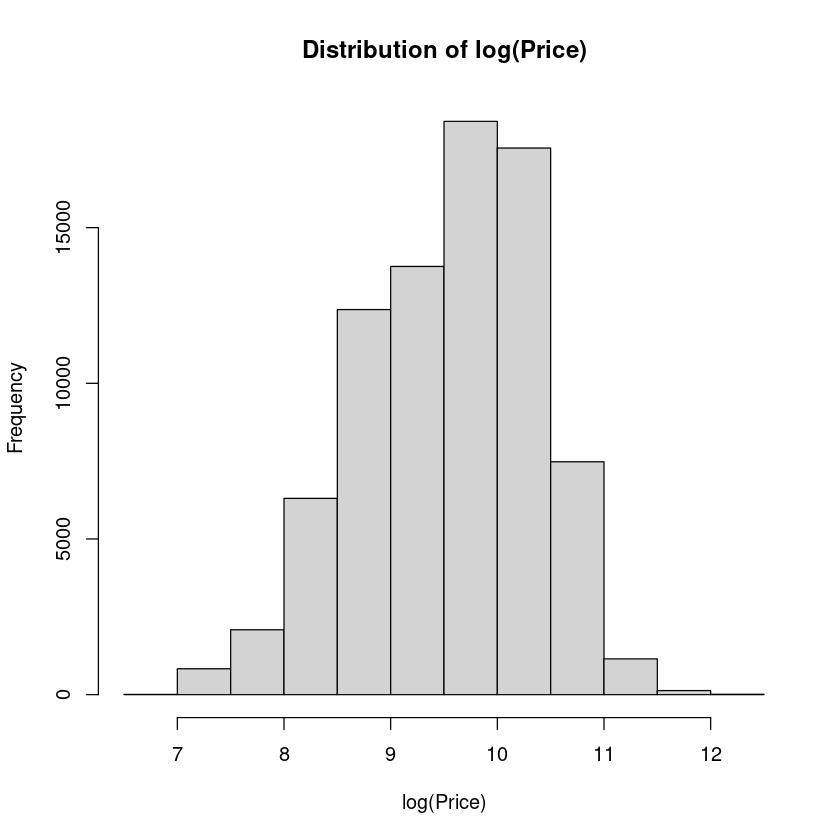

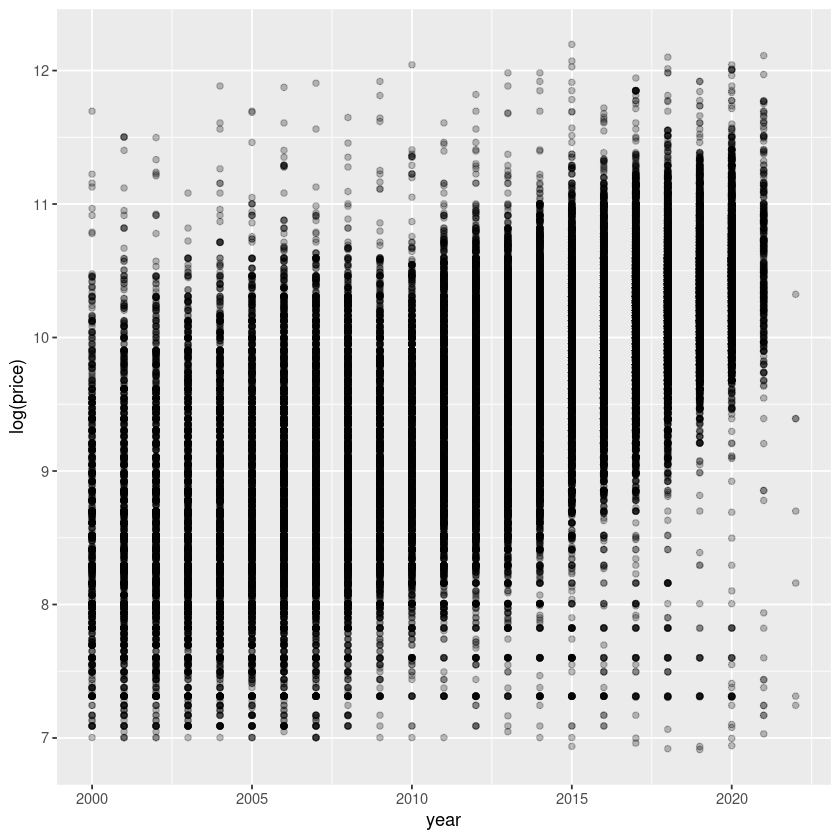

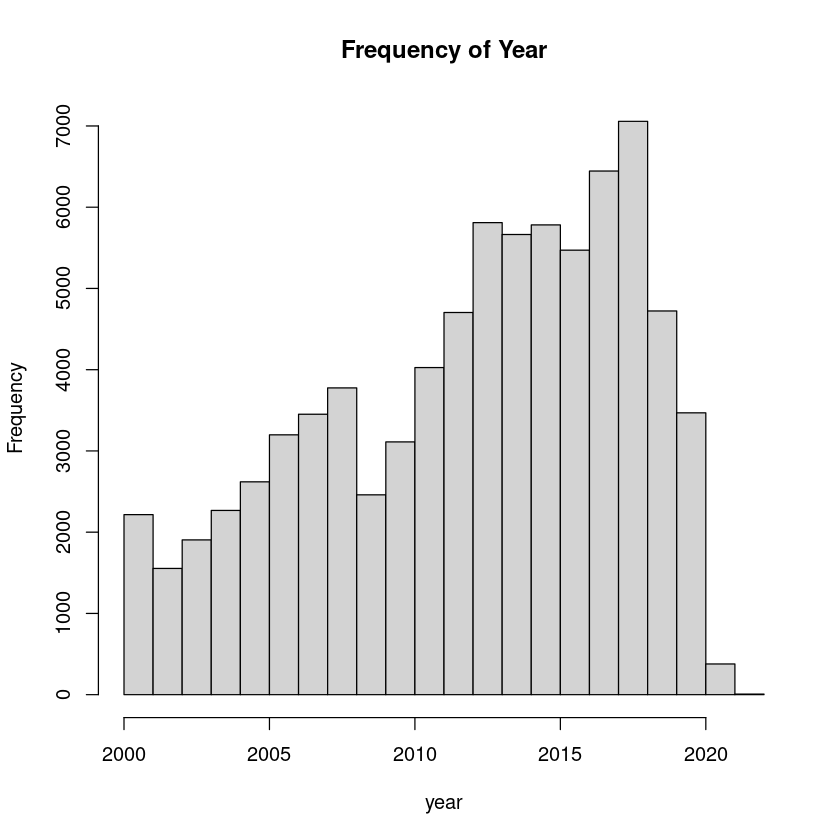

In [5]:
#Creating plots showing price
hist(trainVehicles$price, xlab = 'Price', main = 'Distribution of Price')
hist(log(trainVehicles$price), xlab ='log(Price)', main = 'Distribution of log(Price)')

#check numerical correlation
cor(trainVehicles$year,trainVehicles$odometer)

#creating plots for year
ggplot(trainVehicles, aes(x = year,y = log(price))) + geom_point(alpha = 0.25)
hist(trainVehicles$year,xlab = 'year', main = 'Frequency of Year')

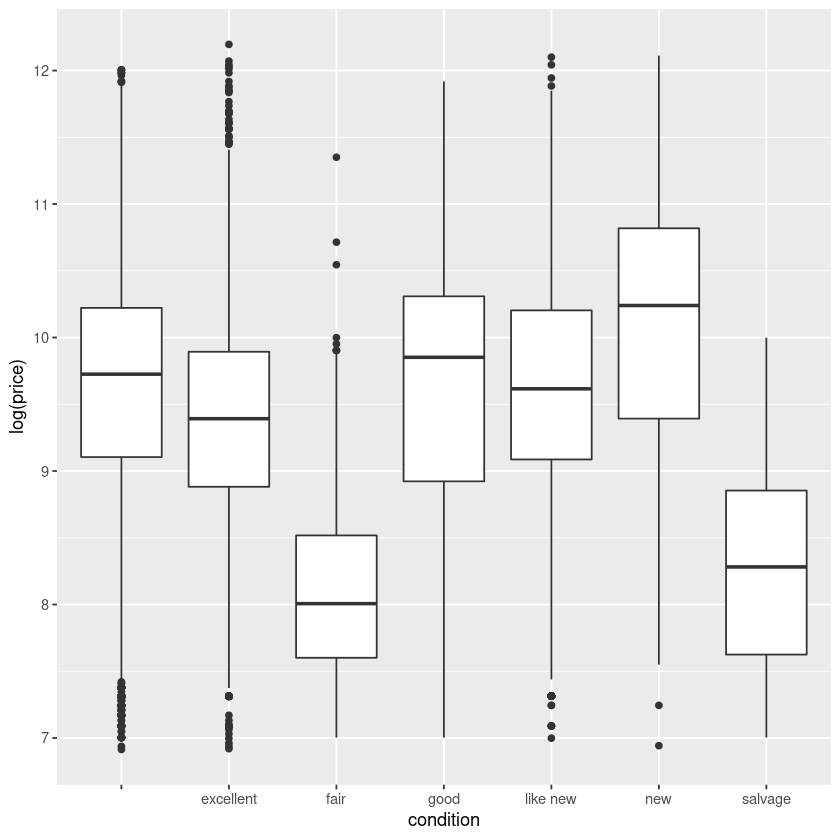

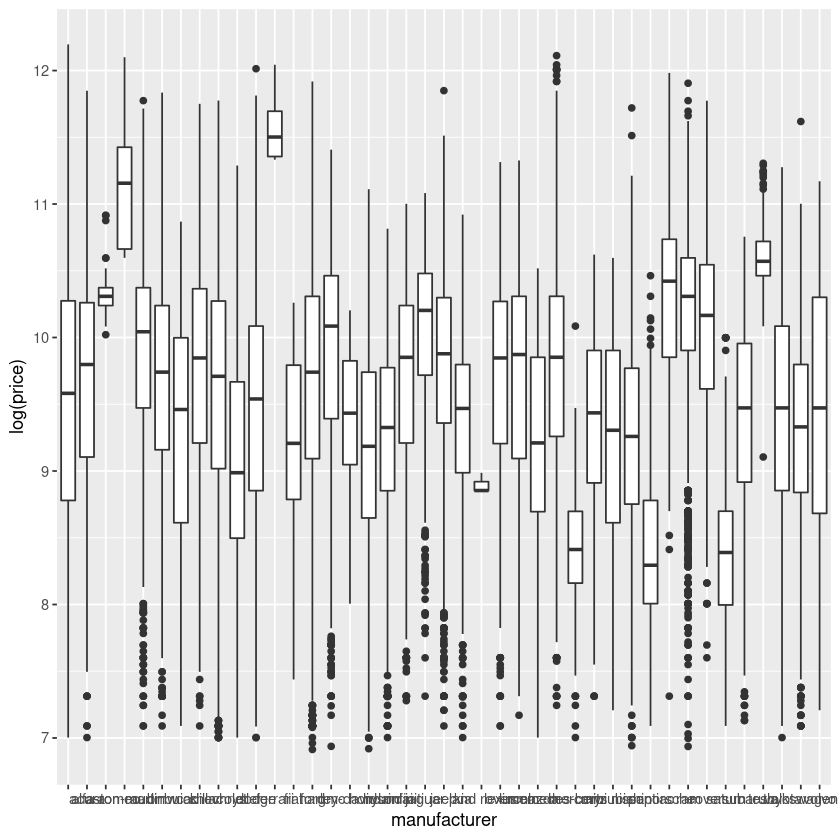

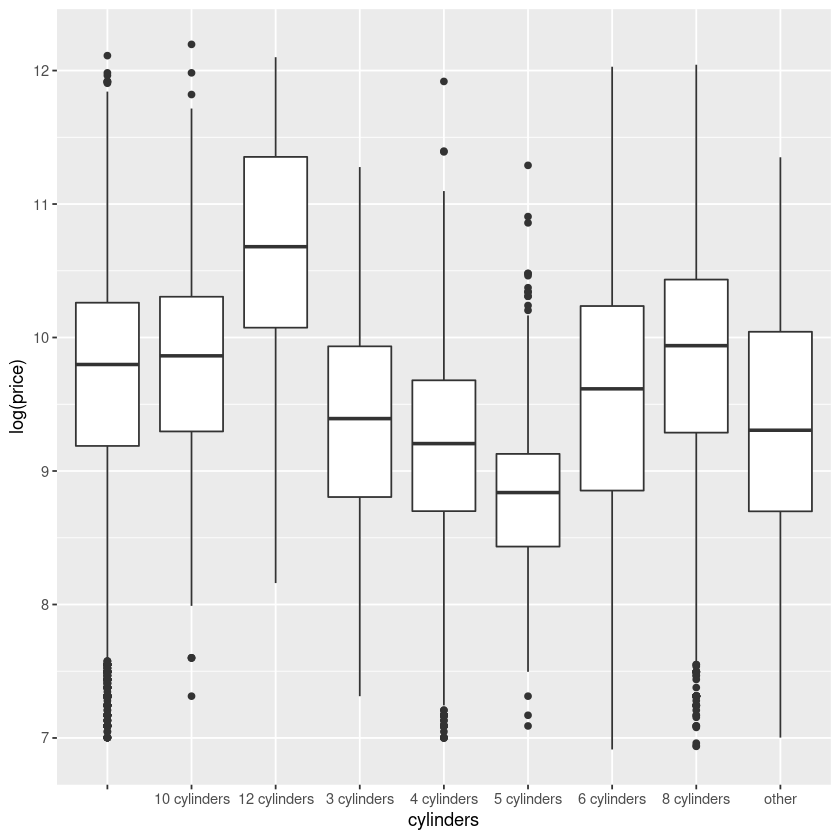

     price             year      manufacturer        condition        
 Min.   :  1006   Min.   :2000   Length:80096       Length:80096      
 1st Qu.:  7900   1st Qu.:2008   Class :character   Class :character  
 Median : 15488   Median :2013   Mode  :character   Mode  :character  
 Mean   : 18846   Mean   :2012                                        
 3rd Qu.: 26590   3rd Qu.:2017                                        
 Max.   :197999   Max.   :2022                                        
  cylinders             fuel              odometer      title_status      
 Length:80096       Length:80096       Min.   :     0   Length:80096      
 Class :character   Class :character   1st Qu.: 40162   Class :character  
 Mode  :character   Mode  :character   Median : 89000   Mode  :character  
                                       Mean   : 93983                     
                                       3rd Qu.:136039                     
                                       Max.   :498572

manufacturer,no_rows
<chr>,<int>
,2507
acura,1308
alfa-romeo,174
aston-martin,7
audi,1665
bmw,3222
buick,908
cadillac,1287
chevrolet,8558


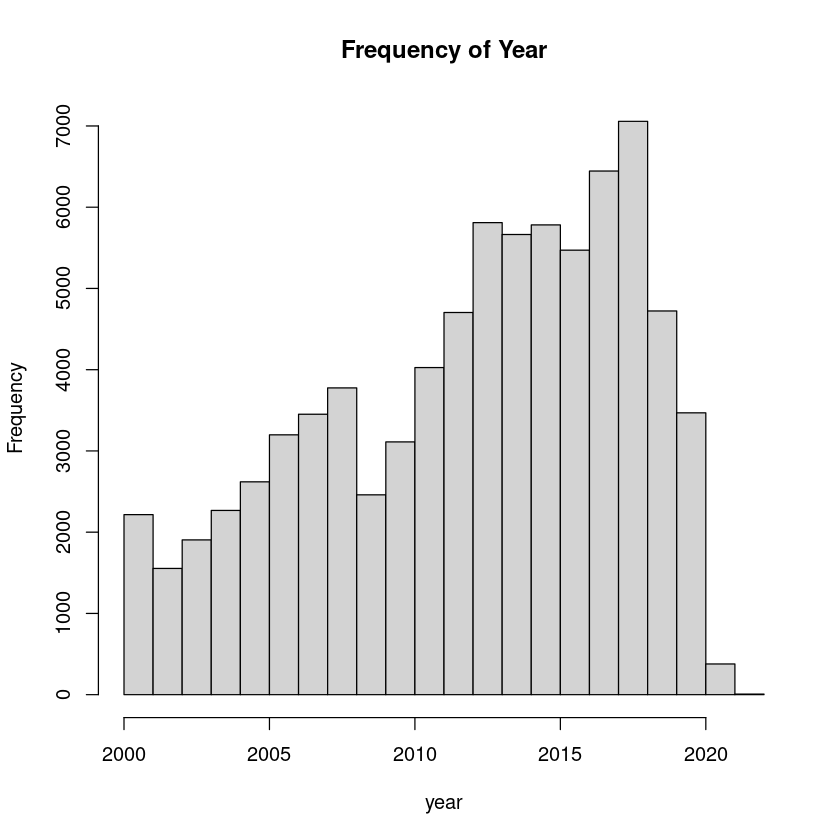

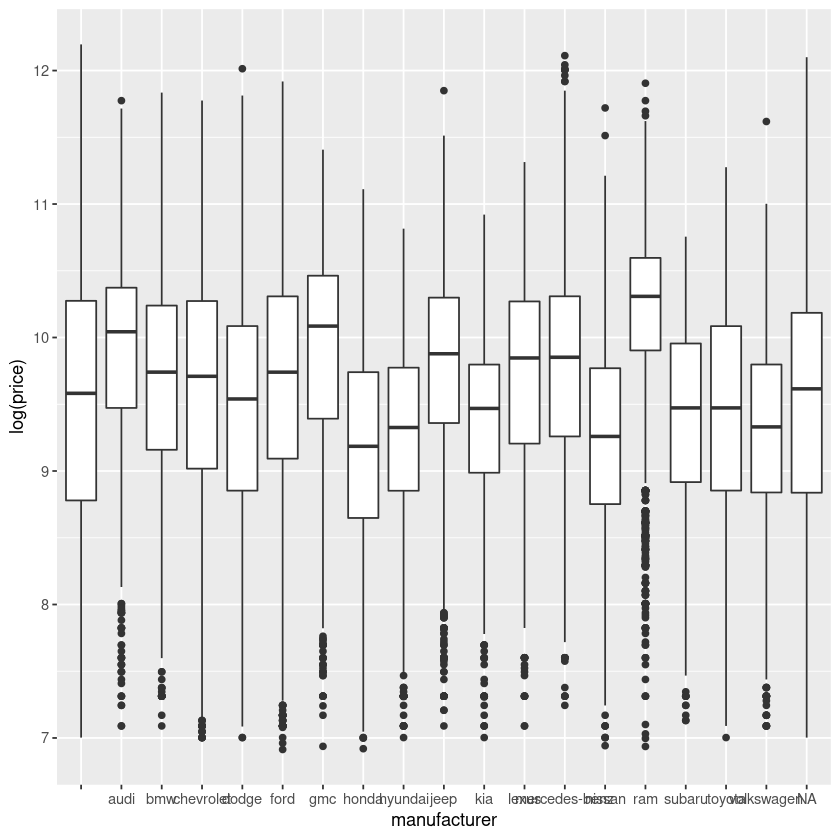

In [6]:
ggplot(aes(x = condition, y = log(price)), data = trainVehicles)+geom_boxplot()

ggplot(aes(x = manufacturer, y = log(price)), data = trainVehicles)+geom_boxplot() # too many manufacturers, crowded. pick sample?

ggplot(aes(x = cylinders, y = log(price)), data = trainVehicles)+geom_boxplot() # technically this data is ordinal; transform and re-do?

hist(trainVehicles$year,xlab = 'year', main = 'Frequency of Year')

summary(trainVehicles)

trainVehicles %>% 
  group_by(manufacturer) %>%
  summarise(no_rows = length(manufacturer))

manufacturerCount = trainVehicles %>% 
  count(manufacturer) %>% 
  filter(n > 1500)

manufacVehicles = !trainVehicles$manufacturer %in% manufacturerCount$manufacturer
trainVehicles2 = trainVehicles
trainVehicles2[manufacVehicles, ]$manufacturer <- NA 
# filter(trainVehicles2, manufacturer != NA)
# drop_na(trainVehicles2, manufacturer)
# trainVehicles2$manufacturer <- droplevels(trainVehicles2$manufacturer)

ggplot(aes(x = manufacturer, y = log(price)), data = trainVehicles2)+geom_boxplot() 

condition,no_rows
<chr>,<int>
,29881
excellent,20892
fair,1003
good,23306
like new,4668
new,252
salvage,94


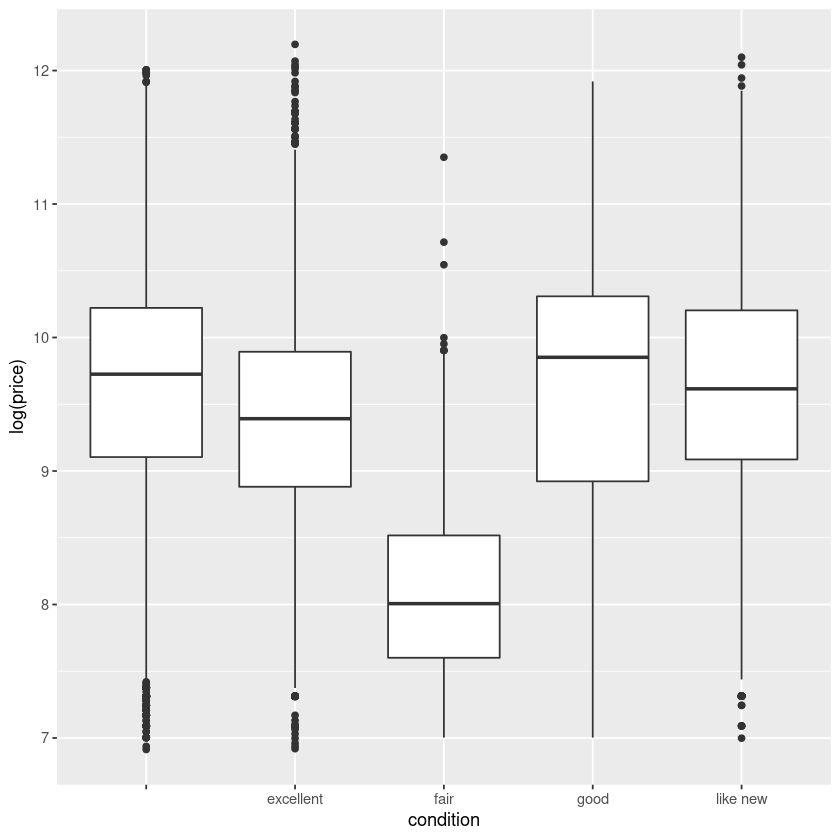

In [7]:
trainVehicles %>% 
  group_by(condition) %>%
  summarise(no_rows = length(condition))

v3 = trainVehicles %>% filter(condition == "" | condition == "excellent" | condition == "fair"  | condition == "like new" | condition == "good")
ggplot(aes(x = condition, y = log(price)), data = v3)+geom_boxplot()

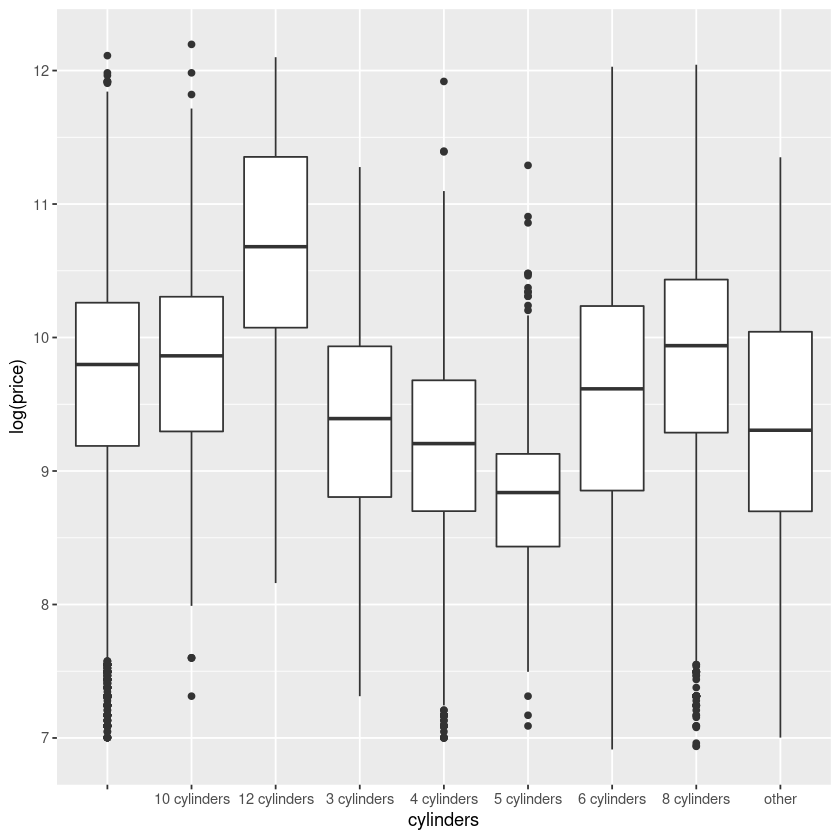

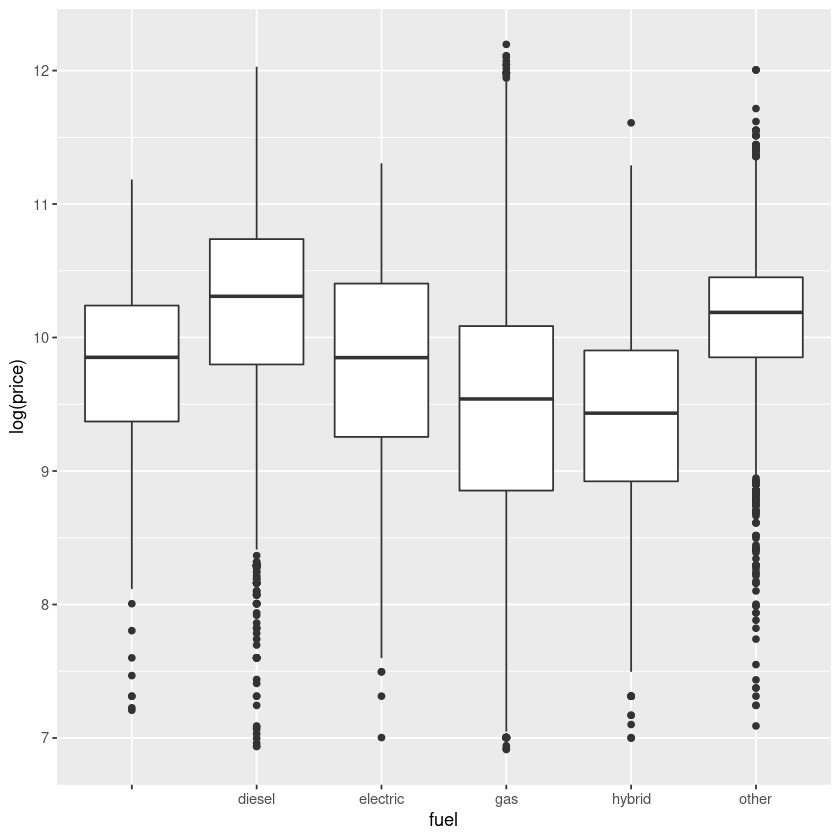

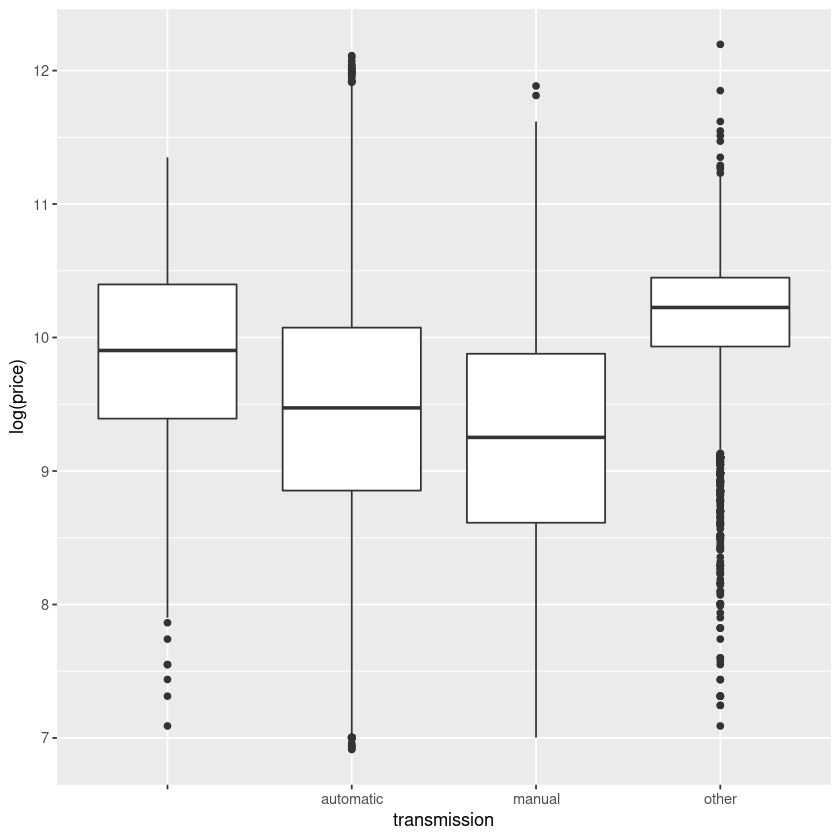

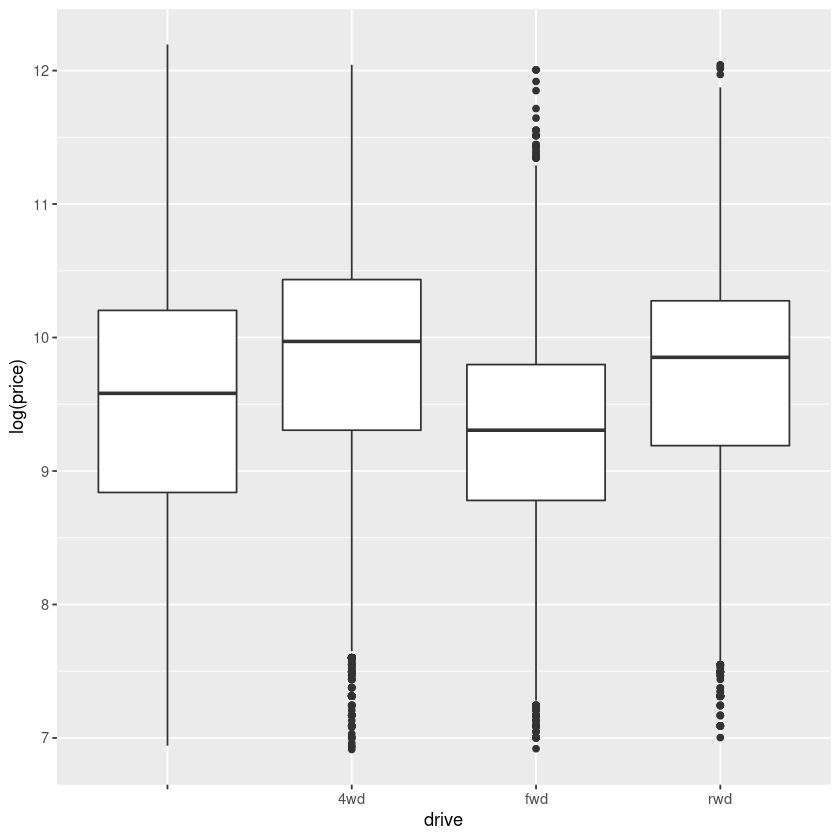

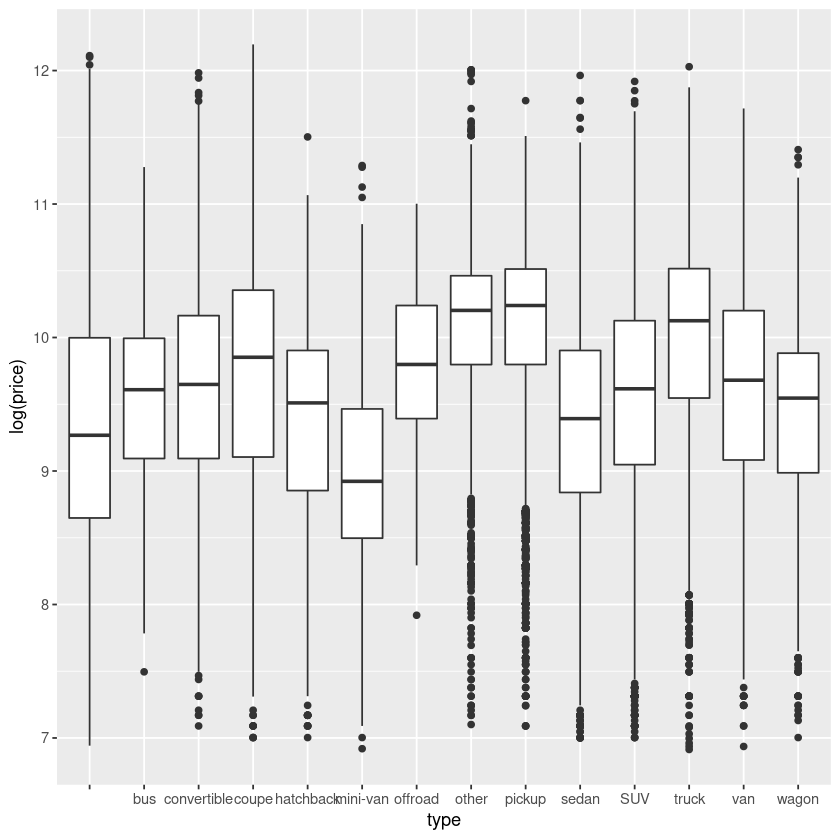

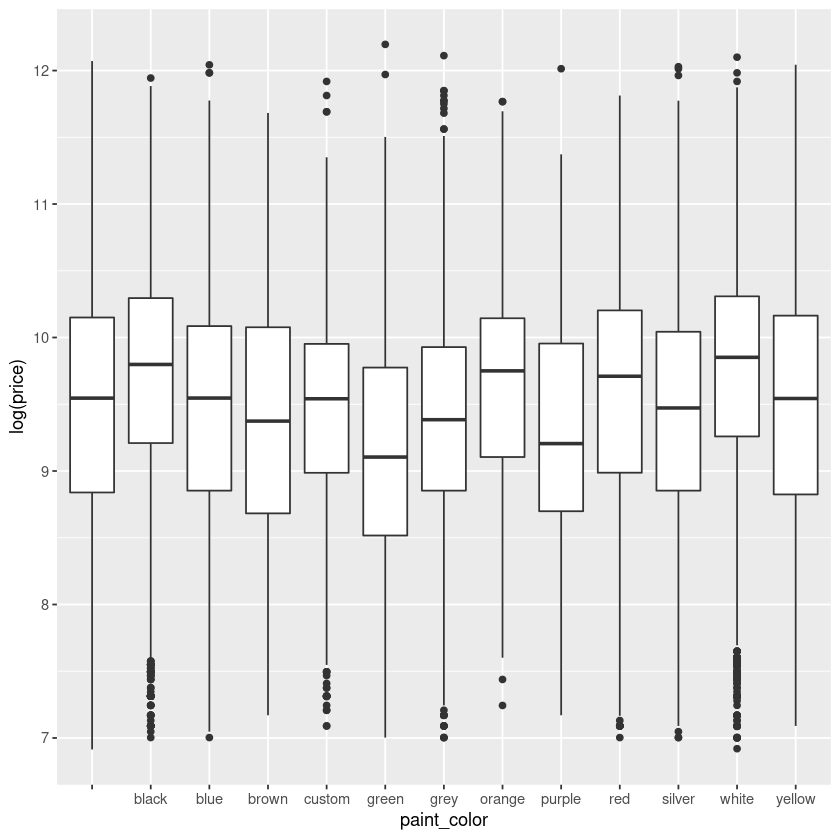

type,no_rows
<chr>,<int>
,16366
bus,97
convertible,1502
coupe,3419
hatchback,3822
mini-van,1042
offroad,123
other,4055
pickup,7315


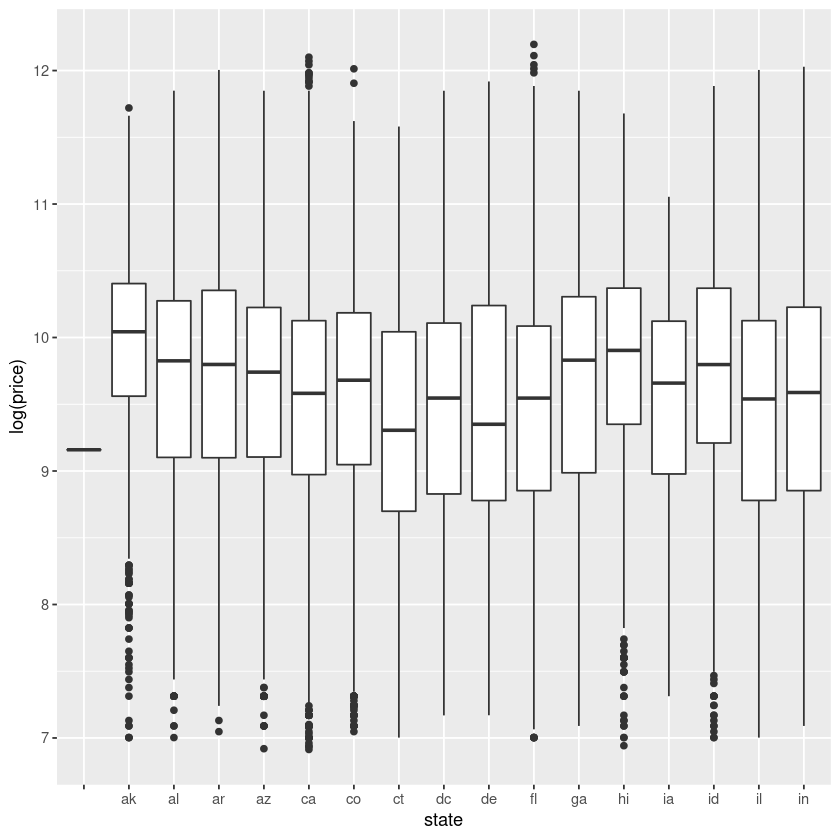

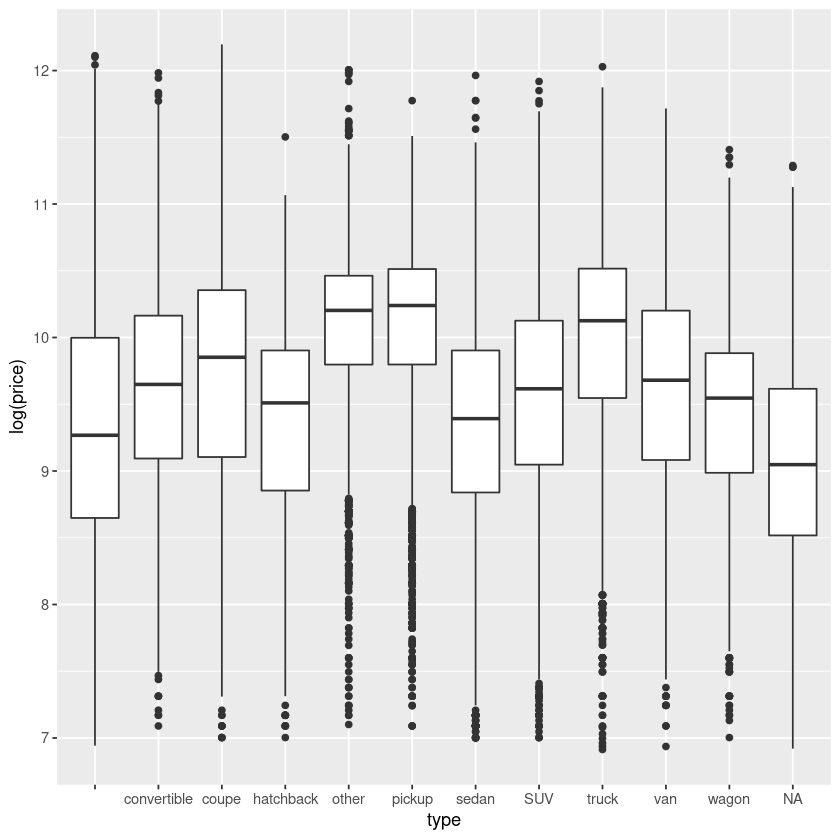

In [8]:
ggplot(aes(x = cylinders, y = log(price)), data = trainVehicles)+geom_boxplot()
ggplot(aes(x = fuel, y = log(price)), data = trainVehicles)+geom_boxplot()
ggplot(aes(x = transmission, y = log(price)), data = trainVehicles)+geom_boxplot()
ggplot(aes(x = drive, y = log(price)), data = trainVehicles)+geom_boxplot()
ggplot(aes(x = type, y = log(price)), data = trainVehicles)+geom_boxplot()
ggplot(aes(x = paint_color, y = log(price)), data = trainVehicles)+geom_boxplot()
ggplot(aes(x = state, y = log(price)), data = trainVehicles)+geom_boxplot()

trainVehicles %>% 
  group_by(type) %>%
  summarise(no_rows = length(type))

# LARGE: 
# bus
# mini-van?
# offroad?
# pickup
# SUV?
# truck
# van
# wagon?
# 
# "MEDIUM":
# convertible
# hatchback
# sedan 
# 

typeCount = trainVehicles %>% 
  count(type) %>% 
  filter(n > 1500)

typeVehicles = !trainVehicles$type %in% typeCount$type
trainVehicles3 = trainVehicles
trainVehicles3[typeVehicles, ]$type <- NA 
ggplot(aes(x = type, y = log(price)), data = trainVehicles3)+geom_boxplot() 

fuel,no_rows
<chr>,<int>
,443
diesel,4743
electric,470
gas,67678
hybrid,1370
other,5392


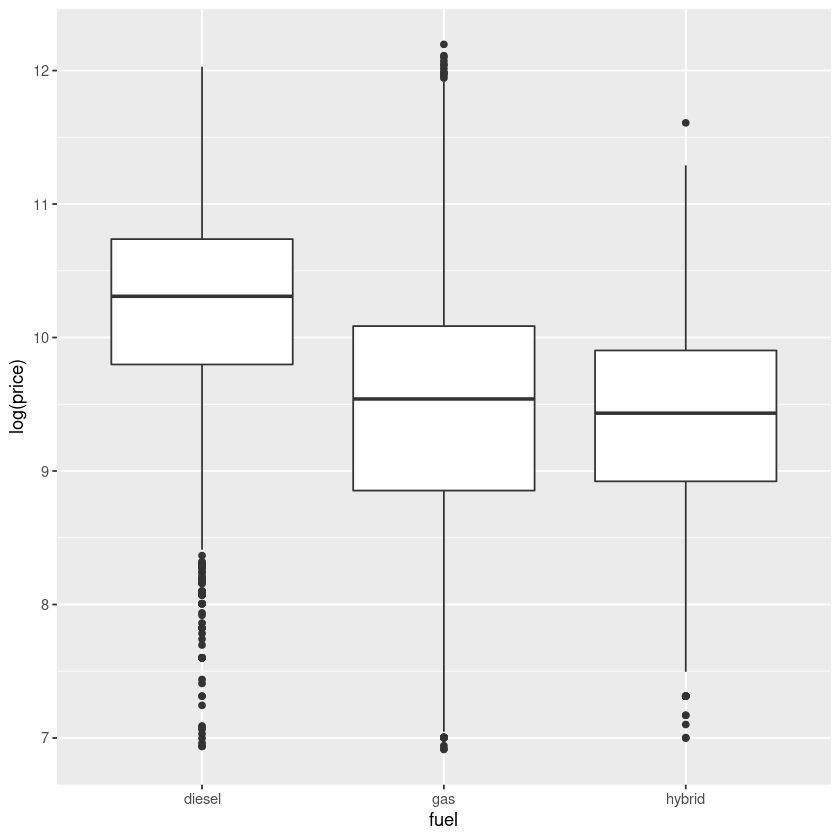

In [9]:
trainVehicles %>% 
  group_by(fuel) %>%
  summarise(no_rows = length(fuel))

v4 = trainVehicles %>% filter(fuel == "diesel" | fuel == "gas" | fuel == "hybrid")
ggplot(aes(x = fuel, y = log(price)), data = v4)+geom_boxplot()

### sqrt(GoodmanKruskal tau) in library(GKtau) can be used for the continuous response versus some categorical features (such as room type) after the response variable has been binned.

### The Goodman and Kruskal tau measure is an asymmetric association measure between two categorical variables, based on the extent to which variation in one variable can be explained by the other. This function returns a dataframe with both forward and backward associations.

In [10]:
install.packages("GoodmanKruskal")

Installing package into ‘/home/daniel/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [11]:
# bin the response variable
trainVehicles <- trainVehicles %>% mutate(price_bins = cut(log(price), breaks = c(7,8,9,10,11,12)))
# head(cleanedVehicles, 10)
trainVehicles%>%group_by(price_bins)%>%count() # excludes 21 rows

library(GoodmanKruskal)
GKtau(trainVehicles$type, trainVehicles$fuel)
GKtau(trainVehicles$type, trainVehicles$manufacturer)
# GKtauDataframe(trainVehicles, includeNA = "no") ## WARNING DO NOT USE
 

GKtau(trainVehicles$type, trainVehicles$price_bins)
GKtau(trainVehicles$manufacturer, trainVehicles$price_bins)
GKtau(trainVehicles$condition, trainVehicles$price_bins)
GKtau(trainVehicles$fuel, trainVehicles$price_bins)

price_bins,n
<fct>,<int>
"(7,8]",2916
"(8,9]",18673
"(9,10]",32167
"(10,11]",25038
"(11,12]",1282
NA,20


xName,yName,Nx,Ny,tauxy,tauyx
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
trainVehicles$type,trainVehicles$fuel,14,6,0.064,0.02


xName,yName,Nx,Ny,tauxy,tauyx
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
trainVehicles$type,trainVehicles$manufacturer,14,41,0.029,0.071


xName,yName,Nx,Ny,tauxy,tauyx
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
trainVehicles$type,trainVehicles$price_bins,14,6,0.057,0.019


xName,yName,Nx,Ny,tauxy,tauyx
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
trainVehicles$manufacturer,trainVehicles$price_bins,41,6,0.052,0.005


xName,yName,Nx,Ny,tauxy,tauyx
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
trainVehicles$condition,trainVehicles$price_bins,7,6,0.029,0.022


xName,yName,Nx,Ny,tauxy,tauyx
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
trainVehicles$fuel,trainVehicles$price_bins,6,6,0.027,0.055
